# Are We Going to Last?
## Predicting Divorce Rates Based on Self Reported Levels of Negative Communication Patterns

**Introduction** - Every newlywed couple has asked themselves at least once: are we going to last? We use the Divorce Prediction Dataset to see how well we can predict whether a couple will get divorced. The dataset contains responses from 150 couples from Turkey on 54 questions about their relationship. The responses are on a  5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always). 

John Gottman is a renowned psychologist who is widely recognized for his work in martial relationships. His research highlights four major predictors of divorce which he refers to as "Four Horsemen of the Apocalypse" - critcism, contempt, defensiveness and stonewalling. 

Our team has selected questions from the Divorce Prediction Dataset that meet the criteria of one of these negative communication patterns. Our goals is to use classification to train the dataset and then see how well we can predict if a couple will get divorced based on their score across these four negative communication patterns.

Variables used:
1. Divorce- A dummy variable - 1 = divorce and 0 = Married 
2. Criticism- This includes couple's score (0-4) across questions that show criticism. John Gottman describes criticism as attacking your partner’s character instead of voicing a complaint. 
3. Contempt- This includes couple's score (0-4) across questions that show contempt. Described as assuming a position of moral superiority while criticising. 
4. Defensiveness This includes couple's score (0-4) across questions that show defensiveness. Described as not taking your partner’s concerns seriously and not taking responsibility for your mistakes.
5. Stonewalling- This includes couple's score (0-4) across questions that show stonewalling. Described as withdrawing from the interaction, shutting down, and not responding to your partner.

**Preliminary Exploratory Data Analysis:**

**Step 1** - Downloading the data into R 

In [1]:
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales

In [2]:
my_url <- "https://raw.githubusercontent.com/apurva-b/dsci100-project-58/main/divorce_data.csv"
data <- read_delim(my_url, delim = ";")
head(data)

Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11, Q12, Q13, Q14, Q15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,⋯,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,4,1,0,0,0,0,0,0,⋯,2,1,3,3,3,2,3,2,1,1
4,4,4,4,4,0,0,4,4,4,⋯,2,2,3,4,4,4,4,2,2,1
2,2,2,2,1,3,2,1,1,2,⋯,3,2,3,1,1,1,2,2,2,1
3,2,3,2,3,3,3,3,3,3,⋯,2,2,3,3,3,3,2,2,2,1
2,2,1,1,1,1,0,0,0,0,⋯,2,1,2,3,2,2,2,1,0,1
0,0,1,0,0,2,0,0,0,1,⋯,2,2,1,2,1,1,1,2,0,1


**Step 2** - Selecting the columns that are relevant to our research question and mutate the data so that the Divorce column is read as a factor instead of an integer


**Method**  

We are using knn classification to predict if a couple will divorce or not as we are identifying between two classes(1 and 0) instead predicting a number. 

To visualize our data, we will use a grouped bar graph where each group represents the marriage status (divorced or married), each group has data from the 4 variables with corresponding average scores in those categories shown on the y-axis. This would be a visually simplistic way to compare overall scores between the married and divorced cohorts, determine which variable (or communication pattern) correlates the strongest with the outcome of divorce. 

**Expected Outcomes and Significance**

We expect to find out how likely couples are to get a divorce based on how they answer these questions. 
The impact of these findings could astronomically change the way couples about to get married feel about their relationship and help them look at their compatibility and how they approach their relationship. It also could potentially give new couples the information they need to target their weaker areas in their relationship allowing them to properly tackle issues and arguments that may arise in their marriage, in turn helping lower their chances of divorce. 

Possible future questions this could lead to could include: should certain couples get married?  Are specific personality types and people better suited together? Is there a way to change how people deal with communication if they score worse in order to save their marriage? 


In [3]:
data <- data |> 
    mutate(Divorce = as_factor(Divorce))

selected_data <- select(data, Divorce, Q32:Q37, Q52, Q31, Q38, Q41, Q48, Q53, Q54, Q49, Q50, Q51, Q42:Q47 )

In [4]:
head(selected_data)

Divorce,Q32,Q33,Q34,Q35,Q36,Q37,Q52,Q31,Q38,⋯,Q54,Q49,Q50,Q51,Q42,Q43,Q44,Q45,Q46,Q47
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,2,0,1,2,3,1,1,⋯,1,3,3,2,1,1,2,3,2,1
1,4,2,3,0,2,3,4,0,4,⋯,2,4,4,4,2,3,4,2,2,2
1,3,1,1,1,1,2,2,3,1,⋯,2,1,1,1,3,2,3,2,3,2
1,3,2,2,1,1,3,2,2,3,⋯,2,3,3,3,2,3,2,3,2,2
1,1,1,1,0,0,0,2,1,0,⋯,0,3,2,2,2,3,0,2,2,1
1,1,1,1,1,1,1,1,4,2,⋯,0,2,1,1,1,2,3,0,2,2


**Step 3** - Creating a new column for each negative communication style by averaging the score for the questions relevant for them. 

For example- Creating a column named Contempt that includes the average score of all the questions that correspond to having contempt in a relationship

In [5]:
mutated_data <- selected_data %>%
mutate( 
    Criticism= rowMeans(across(2:8)), 
    Contempt= rowMeans(across(9:14)), 
    Defensiveness= rowMeans(across(15:17)), 
    Stonewalling = rowMeans(across(18:23)))

In [6]:
head(mutated_data)

Divorce,Q32,Q33,Q34,Q35,Q36,Q37,Q52,Q31,Q38,⋯,Q42,Q43,Q44,Q45,Q46,Q47,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,2,0,1,2,3,1,1,⋯,1,1,2,3,2,1,1.5714286,1.6666667,2.666667,1.666667
1,4,2,3,0,2,3,4,0,4,⋯,2,3,4,2,2,2,2.5714286,2.1666667,4.000000,2.500000
1,3,1,1,1,1,2,2,3,1,⋯,3,2,3,2,3,2,1.5714286,2.3333333,1.000000,2.500000
1,3,2,2,1,1,3,2,2,3,⋯,2,3,2,3,2,2,2.0000000,2.3333333,3.000000,2.333333
1,1,1,1,0,0,0,2,1,0,⋯,2,3,0,2,2,1,0.7142857,0.6666667,2.333333,1.666667
1,1,1,1,1,1,1,1,4,2,⋯,1,2,3,0,2,2,1.0000000,1.8333333,1.333333,1.666667


**Step 4** - Selecting the columns relevant for our analysis

In [7]:
final_dataset <- select(mutated_data, Divorce, Criticism, Contempt, Defensiveness, Stonewalling)

In [8]:
head(final_dataset)

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.5714286,1.6666667,2.666667,1.666667
1,2.5714286,2.1666667,4.000000,2.500000
1,1.5714286,2.3333333,1.000000,2.500000
1,2.0000000,2.3333333,3.000000,2.333333
1,0.7142857,0.6666667,2.333333,1.666667
1,1.0000000,1.8333333,1.333333,1.666667


**Step 5** - The graph is split into 75% training data and 25% testing data as it is a good split in order to train the data while making sure the testing data is large enough.

In [9]:
#Training the data

set.seed(2023)

divorce_split <- initial_split(final_dataset, prop = 0.75, strata = Divorce)   
 divorce_train <- training(divorce_split)    
 divorce_test <- testing(divorce_split) 
 head(divorce_train)
 head(divorce_test)

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.1428571,0.6666667,0.0000000,0.8333333
0,0.4285714,0.8333333,0.3333333,0.5000000
0,0.0000000,0.6666667,0.0000000,0.0000000
0,0.7142857,1.0000000,1.0000000,0.1666667
0,0.2857143,0.1666667,0.0000000,1.1666667
0,0.1428571,0.3333333,1.0000000,1.0000000


Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.571429,1.666667,2.666667,1.666667
1,1.571429,2.000000,1.666667,1.666667
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000
1,4.000000,4.000000,4.000000,4.000000


In [10]:
library(rsample)

In [11]:
class(divorce_train)

[1] "tbl_df"     "tbl"        "data.frame"

In [12]:
folds <- vfold_cv(divorce_train, v = 5, strata = Divorce)

In [13]:
fold_lengths <- lengths(folds$splits)
fold_lengths

[1] 4 4 4 4 4

In [14]:
divorce_recipe <- recipe(Divorce ~ Criticism + Contempt + Defensiveness + Stonewalling, data = divorce_train)|>
 step_normalize(Criticism , Contempt , Defensiveness, Stonewalling)

In [15]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune("neighbors")) |>
  set_engine("kknn") |>
  set_mode("classification")
print(knn_spec)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune("neighbors")
  weight_func = rectangular

Computational engine: kknn 



In [27]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

In [28]:
knn_results <- workflow() |>
  add_recipe(divorce_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = folds, grid = k_vals)|>
 collect_metrics() 

In [29]:
accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9689231,5,0.02245522,Preprocessor1_Model01
6,accuracy,binary,0.9682821,5,0.01453122,Preprocessor1_Model02
11,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model03
16,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model04
21,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model05
26,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model06
31,accuracy,binary,0.9525897,5,0.01465247,Preprocessor1_Model07
36,accuracy,binary,0.9605897,5,0.01217933,Preprocessor1_Model08
41,accuracy,binary,0.9525897,5,0.01465247,Preprocessor1_Model09


In [30]:
best_model <- accuracies |>
  slice_max(order_by = mean, n = 1)

print(best_model)


# A tibble: 1 × 7
  neighbors .metric  .estimator  mean     n std_err .config              
      <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
1         1 accuracy binary     0.969     5  0.0225 Preprocessor1_Model01


In [33]:
knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_final <- workflow() |>
  add_recipe(divorce_recipe) |>
  add_model(knn_best)

knn_final_fit <- fit(knn_final, data = divorce_train)

predictions <- predict(knn_final_fit, new_data = divorce_test)

accuracy <- accuracy(predictions, truth = divorce_test$Divorce, estimate = ".pred_class")

accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9534884


In [46]:
new_data <- data.frame(
  Defensiveness = 3,
  Contempt = 2.5,
  Criticism = 2,
  Stonewalling = 1
)

In [47]:
predictions <- predict(knn_final_fit, new_data)
print(predictions)


# A tibble: 1 × 1
  .pred_class
  <fct>      
1 1          


**Exploratory Data Analysis Using Training Data**

**Step 6** - The training data is summarized into a table that shows the mean of the 4 variables separated into class(1 meaning divorced and 0 meaning married). 

In [20]:
summary_divorce <- divorce_train |>
    group_by(Divorce) |>
    summarise(across(c("Criticism", "Contempt", "Defensiveness", "Stonewalling"), ~mean(.x, na.rm = TRUE)))
summary_divorce

Divorce,Criticism,Contempt,Defensiveness,Stonewalling
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.609375,0.9296875,1.375000,1.364583
1,3.321995,3.3809524,3.439153,3.351852


**Visualization Using Training Data**

**Step 7** - A pivot table is created from the summarized data to group the 4 predictors under a column and corresponding average scores under another to aid in data visualization in Step 8

In [21]:
divorce_train_longer <- summary_divorce |>
                  pivot_longer(cols = -Divorce, names_to = "Predictor", values_to = "Score")
divorce_train_longer
               

Divorce,Predictor,Score
<fct>,<chr>,<dbl>
0,Criticism,0.6093750
0,Contempt,0.9296875
0,Defensiveness,1.3750000
0,Stonewalling,1.3645833
1,Criticism,3.3219955
1,Contempt,3.3809524
1,Defensiveness,3.4391534
1,Stonewalling,3.3518519


**Step 8** - The training data can be visualized using a bar graph that compares distributions of the scores from each variable (the four predictors of divorce) and state of marriage (eg. divorce or married).

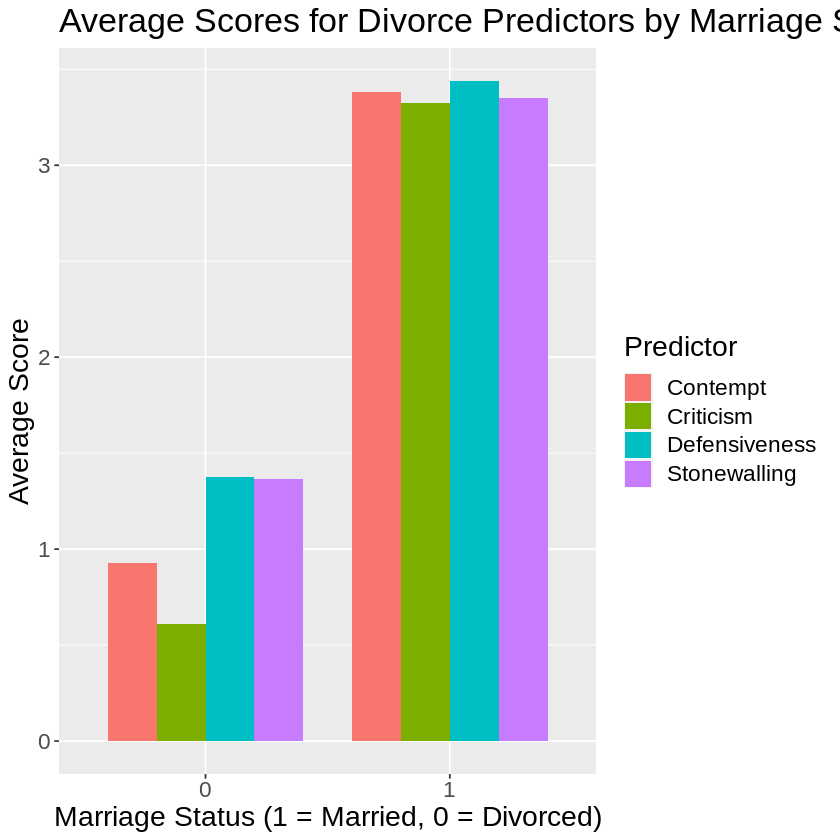

In [22]:
# load necessary package to create visuaization 
library (ggplot2)

# Creating a bar graph showing average scores across the divorce predictors, grouped by marriage status
divorce_train_plot <- ggplot(divorce_train_longer, aes(x = Divorce, y = Score, fill = Predictor)) +
                        geom_bar(stat = "identity", position = "dodge", width = 0.8) +
                        labs(x = "Marriage Status (1 = Married, 0 = Divorced)", y = "Average Score", fill = "Predictor") +
                        ggtitle("Average Scores for Divorce Predictors by Marriage Status")+
                        theme(text = element_text(size=17))
divorce_train_plot

                        


In [23]:
#Recipe

divorce_recipe <- recipe(Divorce ~ Criticism + Contempt + Defensiveness + Stonewalling, data = divorce_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

divorce_vfold <- vfold_cv(divorce_train, v = 5, strata = Divorce)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

divorce_fit <- workflow() |>
                    add_recipe(divorce_recipe) |>
                    add_model(knn_tune) |>
                    fit(data = divorce_train) |>
                    tune_grid(resamples = divorce_vfold, grid = k_vals)
divorce_fit

Warning message:
“tune samples were requested but there were 127 rows in the data. 122 will be used.”


splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          